# Analysis of IMDB Data

We will analyze a subset of IMDB's actors, genres, movie actors, and movie ratings data. This dataset comes to us from Kaggle (https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset) although we have taken steps to pull this data into a publis s3 bucket: 

* s3://cis9760-lecture9-movieanalysis/name.basics.tsv ---> Name Basics
* s3://cis9760-lecture9-movieanalysis/title.basics.tsv ---> Title Basics
* s3://cis9760-lecture9-movieanalysis/title.principals.tsv ---> Title Principles
* s3://cis9760-lecture9-movieanalysis/title.ratings.tsv ---> Title Ratings

# Content

**<br />name.basics.tsv.gz – Contains the following information for names:**
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />primaryName (string)– name by which the person is most often credited.
<br />birthYear – in YYYY format.
<br />deathYear – in YYYY format if applicable, else .
<br />primaryProfession (array of strings)– the top-3 professions of the person.
<br />knownForTitles (array of tconsts) – titles the person is known for.
<br/><br/>
**<br />title.basics.tsv.gz - Contains the following information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
<br />primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release.
<br />originalTitle (string) - original title, in the original language.
<br />isAdult (boolean) - 0: non-adult title; 1: adult title.
<br />startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
<br />endYear (YYYY) – TV Series end year. for all other title types.
<br />runtimeMinutes – primary runtime of the title, in minutes.
<br />genres (string array) – includes up to three genres associated with the title.
<br/><br/>
**<br />title.principals.tsv – Contains the principal cast/crew for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />ordering (integer) – a number to uniquely identify rows for a given titleId.
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />category (string) - the category of job that person was in.
<br />job (string) - the specific job title if applicable, else.
<br />characters (string) - the name of the character played if applicable, else.
<br/><br/>
**<br />title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />averageRating – weighted average of all the individual user ratings.
<br />numVotes - number of votes the title has received.

# PART 1 - Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

In [1]:
%%info



ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
2,application_1702489817810_0003,pyspark,idle,Link,Link,None,


In [2]:
sc.install_pypi_package("pandas==1.0.5")
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
3,application_1702489817810_0004,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's install the necessary packages here

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
4,application_1698945703872_0005,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.functions import *


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now, import the installed packages from the previous block below.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

Load all data from S3 into a Spark dataframe object 

In [5]:
name = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.tsv', sep=r'\t', header=True)
title = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.basics.tsv', sep=r'\t', header=True)
principals = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.principals.tsv', sep=r'\t', header=True)
ratings = spark.read.csv('s3://cis9760-lecture9-movieanalysis/title.ratings.tsv', sep=r'\t', header=True)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
name.createOrReplaceTempView('Name')
title.createOrReplaceTempView('Title')
principals.createOrReplaceTempView('Principals')
ratings.createOrReplaceTempView('Ratings')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Name Basics

In [7]:
name.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

Display the schema below:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

Display the first 5 rows with the following columns:

* `primaryName`
* `birthYear`
* `deathYear`
* `knownForTitles`

In [8]:
name5 = spark.sql(
'''
SELECT primaryName, birthYear, deathYear, knownForTitles
FROM Name
LIMIT 5
''')
name5.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+--------------------+
|    primaryName|birthYear|deathYear|      knownForTitles|
+---------------+---------+---------+--------------------+
|   Fred Astaire|     1899|     1987|tt0050419,tt00531...|
|  Lauren Bacall|     1924|     2014|tt0071877,tt01170...|
|Brigitte Bardot|     1934|       \N|tt0054452,tt00491...|
|   John Belushi|     1949|     1982|tt0077975,tt00725...|
| Ingmar Bergman|     1918|     2007|tt0069467,tt00509...|
+---------------+---------+---------+--------------------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+--------------------+
|    primaryName|birthYear|deathYear|      knownForTitles|
+---------------+---------+---------+--------------------+
|   Fred Astaire|     1899|     1987|tt0050419,tt00531...|
|  Lauren Bacall|     1924|     2014|tt0071877,tt01170...|
|Brigitte Bardot|     1934|       \N|tt0054452,tt00491...|
|   John Belushi|     1949|     1982|tt0077975,tt00725...|
| Ingmar Bergman|     1918|     2007|tt0069467,tt00509...|
+---------------+---------+---------+--------------------+
only showing top 5 rows

## Title Basics

Display the first 15 rows with the following columns:
    
* `titleType`
* `primaryTitle`
* `genres`

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+
|titleType|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|    short|          Carmencita|   Documentary,Short|
|    short|Le clown et ses c...|     Animation,Short|
|    short|      Pauvre Pierrot|Animation,Comedy,...|
|    short|         Un bon bock|     Animation,Short|
|    short|    Blacksmith Scene|        Comedy,Short|
|    short|   Chinese Opium Den|               Short|
|    short|Corbett and Court...|         Short,Sport|
|    short|Edison Kinetoscop...|   Documentary,Short|
|    movie|          Miss Jerry|             Romance|
|    short| Exiting the Factory|   Documentary,Short|
|    short|Akrobatisches Pot...|   Documentary,Short|
|    short|The Arrival of a ...|Action,Documentar...|
|    short|The Photographica...|   Documentary,Short|
|    short|The Sprinkler Spr...|        Comedy,Short|
|    short| Autour d'une cabine|     Animation,Short|
+---------+-----------------

In [9]:
title15 = spark.sql(
'''
SELECT titleType, primaryTitle, genres
FROM Title
LIMIT 15
''')
title15.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+
|titleType|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|    short|          Carmencita|   Documentary,Short|
|    short|Le clown et ses c...|     Animation,Short|
|    short|      Pauvre Pierrot|Animation,Comedy,...|
|    short|         Un bon bock|     Animation,Short|
|    short|    Blacksmith Scene|        Comedy,Short|
|    short|   Chinese Opium Den|               Short|
|    short|Corbett and Court...|         Short,Sport|
|    short|Edison Kinetoscop...|   Documentary,Short|
|    movie|          Miss Jerry|             Romance|
|    short| Exiting the Factory|   Documentary,Short|
|    short|Akrobatisches Pot...|   Documentary,Short|
|    short|The Arrival of a ...|Action,Documentar...|
|    short|The Photographica...|   Documentary,Short|
|    short|The Sprinkler Spr...|        Comedy,Short|
|    short| Autour d'une cabine|     Animation,Short|
+---------+-----------------

Display the unique titles below:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

In [10]:
utitle = spark.sql(
'''
SELECT DISTINCT titleType
FROM Title
''')
utitle.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

Display the schema below:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

In [11]:
title.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

## Title Principles

Display the schema below:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

In [12]:
principals.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

Display the first 15 rows where the "category" column is "self"

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+--------+---+--------------------+
|   tconst|ordering|   nconst|category|job|          characters|
+---------+--------+---------+--------+---+--------------------+
|tt0000001|       1|nm1588970|    self| \N|         ["Herself"]|
|tt0000012|       1|nm2880396|    self| \N|         ["Herself"]|
|tt0000012|       2|nm9735580|    self| \N|         ["Himself"]|
|tt0000012|       3|nm0525900|    self| \N|         ["Herself"]|
|tt0000012|       4|nm9735581|    self| \N|         ["Herself"]|
|tt0000012|       7|nm9735579|    self| \N|         ["Herself"]|
|tt0000012|       8|nm9653419|    self| \N|         ["Herself"]|
|tt0000013|       1|nm0525908|    self| \N|         ["Himself"]|
|tt0000013|       2|nm1715062|    self| \N|         ["Himself"]|
|tt0000016|       1|nm0525900|    self| \N|["Herself (on the...|
|tt0000016|       2|nm9735581|    self| \N|["Herself (on the...|
|tt0000024|       1|nm0256651|    self| \N|["Herself - Empre...|
|tt0000024|       2|nm043

In [15]:
self15=spark.sql('''
SELECT *
FROM Principals
WHERE category = 'self'
LIMIT 15
''')
self15.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+--------+---+--------------------+
|   tconst|ordering|   nconst|category|job|          characters|
+---------+--------+---------+--------+---+--------------------+
|tt0000001|       1|nm1588970|    self| \N|         ["Herself"]|
|tt0000012|       1|nm2880396|    self| \N|         ["Herself"]|
|tt0000012|       2|nm9735580|    self| \N|         ["Himself"]|
|tt0000012|       3|nm0525900|    self| \N|         ["Herself"]|
|tt0000012|       4|nm9735581|    self| \N|         ["Herself"]|
|tt0000012|       7|nm9735579|    self| \N|         ["Herself"]|
|tt0000012|       8|nm9653419|    self| \N|         ["Herself"]|
|tt0000013|       1|nm0525908|    self| \N|         ["Himself"]|
|tt0000013|       2|nm1715062|    self| \N|         ["Himself"]|
|tt0000016|       1|nm0525900|    self| \N|["Herself (on the...|
|tt0000016|       2|nm9735581|    self| \N|["Herself (on the...|
|tt0000024|       1|nm0256651|    self| \N|["Herself - Empre...|
|tt0000024|       2|nm043

## Title Ratings

Display the schema below:

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

In [16]:
ratings.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

Display the first 10 rows in a descending order by the number of votes

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+---------+
|   tconst|averageRating| numVotes|
+---------+-------------+---------+
|tt0111161|          9.3|2159745.0|
|tt0468569|          9.0|2134602.0|
|tt1375666|          8.8|1892958.0|
|tt0137523|          8.8|1725444.0|
|tt0110912|          8.9|1695159.0|
|tt0109830|          8.8|1662609.0|
|tt0944947|          9.4|1606096.0|
|tt0133093|          8.7|1554345.0|
|tt0120737|          8.8|1548920.0|
|tt0167260|          8.9|1533632.0|
|tt0068646|          9.2|1482225.0|
|tt1345836|          8.4|1421506.0|
|tt0167261|          8.7|1387208.0|
|tt0816692|          8.6|1348184.0|
|tt0114369|          8.6|1327441.0|
+---------+-------------+---------+
only showing top 15 rows

In [17]:
numvotes=spark.sql(
'''
SELECT *
FROM Ratings
ORDER BY CAST(numVotes AS int) DESC
LIMIT 10
''')
numvotes.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0111161|          9.3| 2159745|
|tt0468569|          9.0| 2134602|
|tt1375666|          8.8| 1892958|
|tt0137523|          8.8| 1725444|
|tt0110912|          8.9| 1695159|
|tt0109830|          8.8| 1662609|
|tt0944947|          9.4| 1606096|
|tt0133093|          8.7| 1554345|
|tt0120737|          8.8| 1548920|
|tt0167260|          8.9| 1533632|
+---------+-------------+--------+

# Overview of Data

Display the number of rows and columns in each dataFrame object.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Name Basics table: 6
Number of rows in Name Basics table: 9706922

Number of columns in Title Basics table: 9
Number of rows in Title Basics table: 6321302

Number of columns in Title Principles table: 6
Number of rows in Title Principles table: 36468817

Number of columns in Title Ratings table: 3
Number of rows in Title Ratings table: 993153

In [18]:


print(f'Total Columns in Name Basics: {len(name.dtypes)}')
print(f'Total Rows in Name: {name.count():,}')

print(f'Total Columns in Title Basics: {len(title.dtypes)}')
print(f'Total Rows in Title Basics: {title.count():,}')

print(f'Total Columns in Title Principals: {len(principals.dtypes)}')
print(f'Total Rows in Title Principals: {principals.count():,}')

print(f'Total Columns in Title Ratings: {len(ratings.dtypes)}')
print(f'Total Rows in Title Ratings: {ratings.count():,}')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns in Name Basics: 6
Total Rows in Name: 9,706,922
Total Columns in Title Basics: 9
Total Rows in Title Basics: 6,321,302
Total Columns in Title Principals: 6
Total Rows in Title Principals: 36,468,817
Total Columns in Title Ratings: 3
Total Rows in Title Ratings: 993,153

# PART 2 - Analyzing Genres

Let's now answer this question: how many unique genres are represented in this dataset?

Essentially, we have the genres per movie as a list - this is useful to quickly see what each movie might be represented as but it is difficult to easily answer questions such as:

* How many movies are categorized as Comedy, for instance?
* What are the top 20 most popular genres available?

## Association Table

We need to "break out" these genres from the tconst? One common approach to take is to build an association table mapping a single tconst multiple times to each distinct genre.

For instance, given the following:


| tconst   | titleType  |genres |
|----------|------------|-------|
| abcd123  | XXX        |a,b,c  |

We would like to derive something like:

| tconst   |  titleType |genre |
|----------|------------|------|
| abcd123  | XXX        |a     |
| abcd123  | XXX        |b     |
| abcd123  | XXX        |c     |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from the data set

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+
|   tconst|titleType|              genres|
+---------+---------+--------------------+
|tt0000001|    short|   Documentary,Short|
|tt0000002|    short|     Animation,Short|
|tt0000003|    short|Animation,Comedy,...|
|tt0000004|    short|     Animation,Short|
|tt0000005|    short|        Comedy,Short|
+---------+---------+--------------------+
only showing top 5 rows

Display the first 10 rows of your association table below

In [19]:
splitgenre=title.select(title.tconst,title.titleType,title.genres)
splitgenre=splitgenre.withColumn('genre',explode(split('genres',","))).drop('genres')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
splitgenre.show(10)
splitgenre.createOrReplaceTempView('SplitGenre')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|   tconst|titleType|      genre|
+---------+---------+-----------+
|tt0000001|    short|Documentary|
|tt0000001|    short|      Short|
|tt0000002|    short|  Animation|
|tt0000002|    short|      Short|
|tt0000003|    short|  Animation|
|tt0000003|    short|     Comedy|
|tt0000003|    short|    Romance|
|tt0000004|    short|  Animation|
|tt0000004|    short|      Short|
|tt0000005|    short|     Comedy|
+---------+---------+-----------+
only showing top 10 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|   tconst|titleType|      genre|
+---------+---------+-----------+
|tt0000001|    short|Documentary|
|tt0000001|    short|      Short|
|tt0000002|    short|  Animation|
|tt0000002|    short|      Short|
|tt0000003|    short|  Animation|
|tt0000003|    short|     Comedy|
|tt0000003|    short|    Romance|
|tt0000004|    short|  Animation|
|tt0000004|    short|      Short|
|tt0000005|    short|     Comedy|
+---------+---------+-----------+
only showing top 10 rows

## Total Unique Genres

**What is the total number of unique genres available in the movie title type?**

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

In [22]:
spark.sql('''
SELECT COUNT (DISTINCT genre) AS numgenre
FROM SplitGenre
WHERE titleType == 'movie'
''').show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+
|numgenre|
+--------+
|      29|
+--------+

**What are the unique genres available?**

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|genre      |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|\N         |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Film-Noir  |
|Short      |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
|Comedy     |
|Crime      |
|War        |
|Game-Show  |
|Adult      |
|Music      |
|Biography  |
|Adventure  |
|Horror     |
+-----------+

In [27]:
spark.sql('''SELECT DISTINCT genre
FROM SplitGenre''').show(50)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|      genre|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
|         \N|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|  Film-Noir|
|      Short|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
|      Crime|
|        War|
|  Game-Show|
|      Adult|
|      Music|
|  Biography|
|  Adventure|
|     Horror|
+-----------+

**Oops! Something is off!**

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|genre      |
+-----------+
|Mystery    |
|Musical    |
|Sport      |
|Action     |
|Talk-Show  |
|Romance    |
|Thriller   |
|Reality-TV |
|Family     |
|Fantasy    |
|History    |
|Animation  |
|Film-Noir  |
|Short      |
|Sci-Fi     |
|News       |
|Drama      |
|Documentary|
|Western    |
|Comedy     |
|Crime      |
|War        |
|Game-Show  |
|Adult      |
|Music      |
|Biography  |
|Adventure  |
|Horror     |
+-----------+

In [28]:
splitgenre.select(splitgenre.genre).filter(splitgenre.genre != '\\N').distinct().show(50)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|      genre|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|  Film-Noir|
|      Short|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
|      Crime|
|        War|
|  Game-Show|
|      Adult|
|      Music|
|  Biography|
|  Adventure|
|     Horror|
+-----------+

In [29]:
splitgenre=splitgenre.filter(splitgenre.genre != '\\N')
splitgenre.createOrReplaceTempView('SplitGenre')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Top Genres by Movies

Now let's find the highest rated genres in this dataset by rolling up genres.

### Average Rating / Genre

So now, let's unroll our distinct count a bit and display the per average rating value of per genre.

The expected output should be:

| genre | averageRating |
|-------------|------------|
| a     | 8.5         |
| b     | 6.3         |
| c     | 7.2         |

Or something to that effect.

First, let's join our two dataframes (movie ratings and genres) by tconst

In [34]:
movieg=splitgenre.select('tconst','genre', 'titleType').filter(splitgenre.titleType == 'movie')
movieg.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----------+---------+
|   tconst|      genre|titleType|
+---------+-----------+---------+
|tt0000009|    Romance|    movie|
|tt0000147|Documentary|    movie|
|tt0000147|       News|    movie|
|tt0000147|      Sport|    movie|
|tt0000335|  Biography|    movie|
|tt0000335|      Drama|    movie|
|tt0000574|  Biography|    movie|
|tt0000574|      Crime|    movie|
|tt0000574|      Drama|    movie|
|tt0000615|      Drama|    movie|
|tt0000630|      Drama|    movie|
|tt0000675|      Drama|    movie|
|tt0000676|      Drama|    movie|
|tt0000679|  Adventure|    movie|
|tt0000679|    Fantasy|    movie|
|tt0000739|      Drama|    movie|
|tt0000793|      Drama|    movie|
|tt0000886|      Drama|    movie|
|tt0000941|      Drama|    movie|
|tt0001028|     Comedy|    movie|
+---------+-----------+---------+
only showing top 20 rows

In [35]:
movieg.createOrReplaceTempView('MovieG')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
name = name.withColumn("birthYear", (col("birthYear").cast("int")))
name = name.withColumn("deathYear", (col("deathYear").cast("int")))
title= title.withColumn("startYear", (col("startYear").cast("int")))
title= title.withColumn("endYear", (col("endYear").cast("int")))
title = title.withColumn("runtimeMinutes", (col("runtimeMinutes").cast("int")))
principals= principals.withColumn("ordering", (col("ordering").cast("int")))
ratings = ratings.withColumn("averageRating", (col("averageRating").cast("float")))
ratings = ratings.withColumn("numVotes", (col("numVotes").cast("int")))





VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
name.createOrReplaceTempView('Name')
title.createOrReplaceTempView('Title')
principals.createOrReplaceTempView('Principals')
ratings.createOrReplaceTempView('Ratings')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|    genre|averageRating|
+---------+-------------+
|    Drama|          4.2|
|    Drama|          4.2|
|Biography|          4.1|
|    Drama|          4.1|
|  History|          4.1|
|    Drama|          5.7|
|    Drama|          4.6|
|  History|          4.6|
|Biography|          6.3|
|    Drama|          6.3|
+---------+-------------+
only showing top 10 rows

In [39]:
spark.sql('''
SELECT MovieG.genre, Ratings.averageRating
FROM Ratings  INNER JOIN  MovieG ON Ratings.tconst == MovieG.tconst''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-------------+
|      genre|averageRating|
+-----------+-------------+
|    Romance|          5.4|
|Documentary|          5.2|
|       News|          5.2|
|      Sport|          5.2|
|  Biography|          6.2|
|      Drama|          6.2|
|  Biography|          6.1|
|      Crime|          6.1|
|      Drama|          6.1|
|      Drama|          4.8|
|      Drama|          2.7|
|      Drama|          4.2|
|      Drama|          3.6|
|  Adventure|          4.8|
|    Fantasy|          4.8|
|      Drama|          6.2|
|      Drama|          4.2|
|      Drama|          5.2|
|      Drama|          4.2|
|     Comedy|          4.0|
+-----------+-------------+
only showing top 20 rows

Now, let's aggregate along the averageRating column to get a resultant dataframe that displays average rating per genre.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|genre      |avg_rating       |
+-----------+-----------------+
|Mystery    |5.940437537126316|
|Musical    |6.203246053185319|
|Action     |5.718734067904495|
|Sport      |6.600145190943391|
|Romance    |6.125714179294426|
|Thriller   |5.625967567519544|
|Family     |6.250560452699635|
|Fantasy    |5.924820762891499|
|History    |6.822718117193864|
|Animation  |6.326203749467441|
|Film-Noir  |6.636246780503378|
|Sci-Fi     |5.325150006900168|
|News       |7.200916040944689|
|Drama      |6.288080211097538|
|Documentary|7.245469805371099|
|Western    |5.948970991005059|
|Comedy     |5.941363107822231|
|Crime      |6.026013333109149|
|War        |6.483807036278403|
|Adult      |5.721742579082059|
+-----------+-----------------+
only showing top 20 rows

In [40]:
genre_rating=spark.sql('''
SELECT MovieG.genre, AVG(Ratings.averageRating) AS avg_rating
FROM Ratings  INNER JOIN  MovieG ON Ratings.tconst == MovieG.tconst
GROUP BY MovieG.genre''')

genre_rating.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|      genre|       avg_rating|
+-----------+-----------------+
|    Mystery|5.940437537126316|
|    Musical|6.203246053185319|
|      Sport|6.600145190943391|
|     Action|5.718734067904495|
|  Talk-Show|5.800000190734863|
|    Romance|6.125714179294426|
|   Thriller|5.625967567519544|
| Reality-TV|6.379310377712907|
|     Family|6.250560452699635|
|    Fantasy|5.924820762891499|
|    History|6.822718117193864|
|  Animation|6.326203749467441|
|  Film-Noir|6.636246780503378|
|      Short|7.259999942779541|
|     Sci-Fi|5.325150006900168|
|       News|7.200916040944689|
|      Drama|6.288080211097538|
|Documentary|7.245469805371099|
|    Western|5.948970991005059|
|     Comedy|5.941363107822231|
+-----------+-----------------+
only showing top 20 rows

### Horizontal Bar Chart of Top Genres

With this data available, let us now build a barchart of all genres 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|genre      |avg_rating       |
+-----------+-----------------+
|Short      |7.259999942779541|
|Documentary|7.245469805371099|
|News       |7.200916040944689|
|Biography  |6.983637643044585|
|Game-Show  |6.974999904632568|
|History    |6.822718117193864|
|Music      |6.752020207214588|
|Film-Noir  |6.636246780503378|
|Sport      |6.600145190943391|
|War        |6.483807036278403|
|Reality-TV |6.379310377712907|
|Animation  |6.326203749467441|
|Drama      |6.288080211097538|
|Family     |6.250560452699635|
|Musical    |6.203246053185319|
|Romance    |6.125714179294426|
|Crime      |6.026013333109149|
|Western    |5.948970991005059|
|Comedy     |5.941363107822231|
|Mystery    |5.940437537126316|
+-----------+-----------------+
only showing top 20 rows

In [42]:
or_genre_rating=spark.sql('''
SELECT MovieG.genre, AVG(Ratings.averageRating) AS avg_rating
FROM Ratings  INNER JOIN  MovieG ON Ratings.tconst == MovieG.tconst
GROUP BY MovieG.genre
ORDER BY avg_rating Desc''')

or_genre_rating.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|      genre|       avg_rating|
+-----------+-----------------+
|      Short|7.259999942779541|
|Documentary|7.245469805371099|
|       News|7.200916040944689|
|  Biography|6.983637643044585|
|  Game-Show|6.974999904632568|
|    History|6.822718117193864|
|      Music|6.752020207214588|
|  Film-Noir|6.636246780503378|
|      Sport|6.600145190943391|
|        War|6.483807036278403|
| Reality-TV|6.379310377712907|
|  Animation|6.326203749467441|
|      Drama|6.288080211097538|
|     Family|6.250560452699635|
|    Musical|6.203246053185319|
|    Romance|6.125714179294426|
|      Crime|6.026013333109149|
|    Western|5.948970991005059|
|     Comedy|5.941363107822231|
|    Mystery|5.940437537126316|
+-----------+-----------------+
only showing top 20 rows

In [157]:
re_genre_rating=spark.sql('''
SELECT MovieG.genre, AVG(Ratings.averageRating) AS avg_rating
FROM Ratings  INNER JOIN  MovieG ON Ratings.tconst == MovieG.tconst
GROUP BY MovieG.genre
ORDER BY avg_rating ''')



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

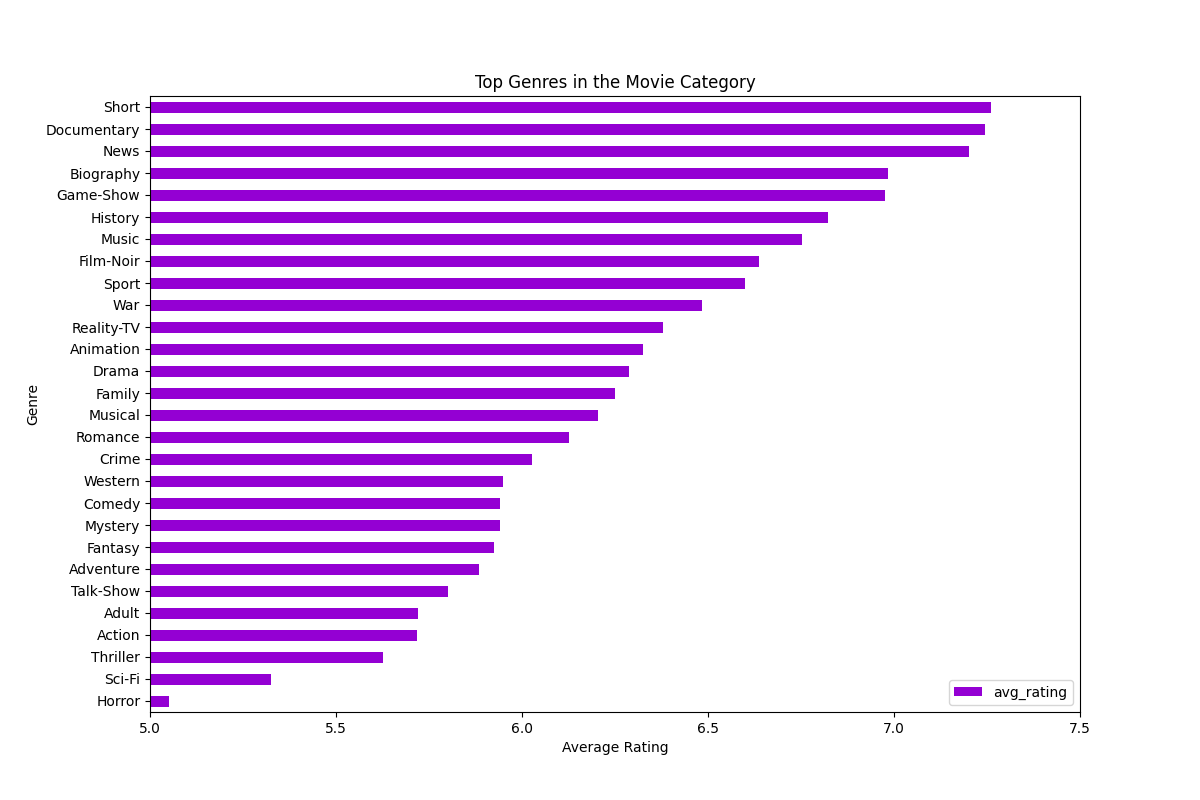

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

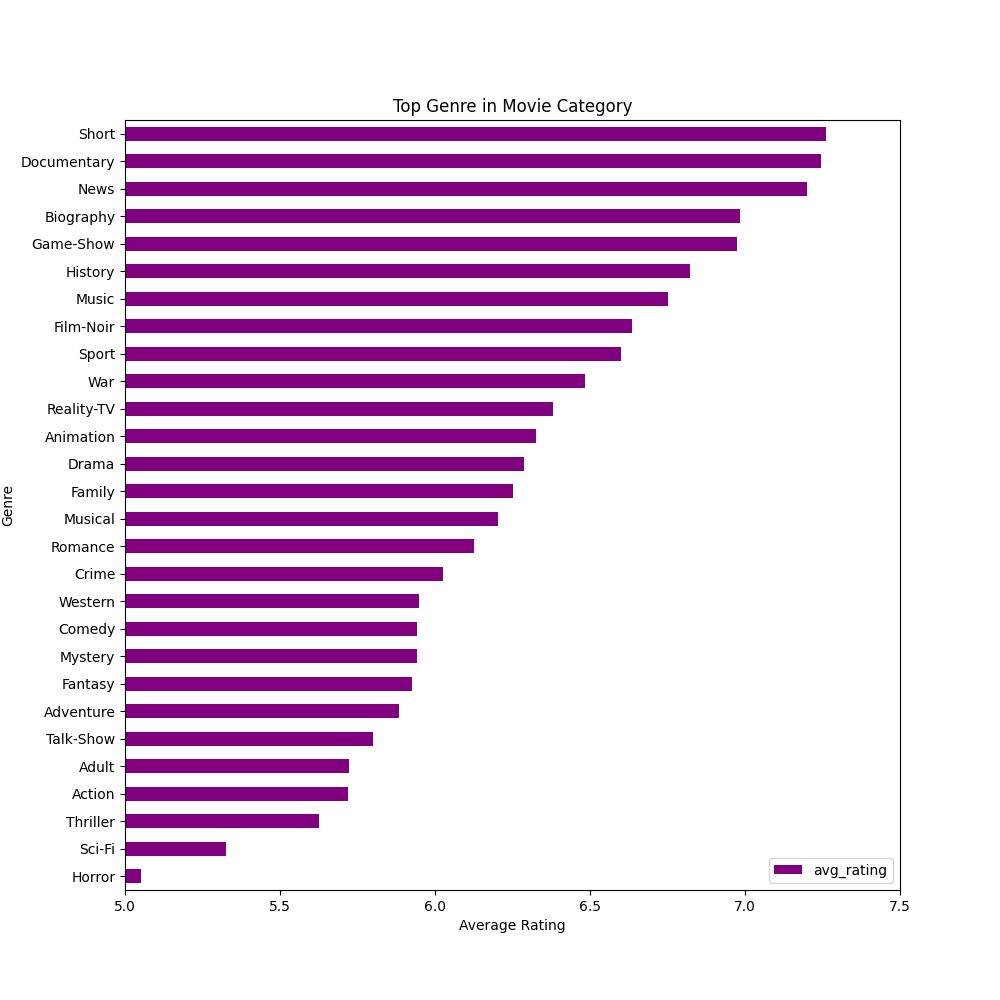

In [158]:
re_genre_rating.toPandas().plot.barh(y='avg_rating', x='genre',figsize=(10,10), color = 'purple')
plt.xlabel('Average Rating')
plt.ylabel('Genre')  
plt.title('Top Genre in Movie Category')
plt.xlim(5,7.5)

%matplot plt

## PART 3 - Analyzing Job Categories

## Total Unique Job Categories

**What is the total number of unique job categories?**

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
+---------+---------------+
only showing top 5 rows

In [62]:
jobcat=spark.sql('''
SELECT tconst,  EXPLODE(SPLIT(category, ',')) AS job_category
FROM Principals''')
jobcat.show(10)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|   job_category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
|tt0000003|       director|
|tt0000003|       producer|
|tt0000003|       composer|
|tt0000003|         editor|
|tt0000004|       director|
+---------+---------------+
only showing top 10 rows

In [63]:
jobcat.createOrReplaceTempView('JobCat')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

In [64]:
spark.sql('''
SELECT COUNT(DISTINCT job_category)
FROM JobCat
WHERE job_category IS NOT NULL''').show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------+
|count(DISTINCT job_category)|
+----------------------------+
|                          12|
+----------------------------+

**What are the unique job categories available?**

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|category           |
+-------------------+
|actress            |
|producer           |
|production_designer|
|writer             |
|actor              |
|cinematographer    |
|archive_sound      |
|archive_footage    |
|self               |
|editor             |
|composer           |
|director           |
+-------------------+

In [65]:
spark.sql('''
SELECT DISTINCT job_category
FROM JobCat
WHERE job_category IS NOT NULL''').show()



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|       job_category|
+-------------------+
|            actress|
|           producer|
|production_designer|
|             writer|
|              actor|
|    cinematographer|
|      archive_sound|
|    archive_footage|
|               self|
|             editor|
|           composer|
|           director|
+-------------------+

## Top Job Categories

Now let's find the top job categories in this dataset by rolling up categories.

### Counts of Titles / Job Category

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|category           |count  |
+-------------------+-------+
|actress            |6325097|
|producer           |2197866|
|production_designer|285924 |
|writer             |4811596|
|actor              |8493701|
|cinematographer    |1300404|
|archive_sound      |2143   |
|archive_footage    |209035 |
|self               |6153089|
|editor             |1197669|
|composer           |1313187|
|director           |4179106|
+-------------------+-------+

In [ ]:
spark.sql('''
SELECT job_category, COUNT( job_category) AS count
FROM JobCat
WHERE job_category IS NOT NULL
GROUP BY job_category''').show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|       job_category|  count|
+-------------------+-------+
|            actress|6325097|
|           producer|2197866|
|production_designer| 285924|
|             writer|4811596|
|              actor|8493701|
|    cinematographer|1300404|
|      archive_sound|   2143|
|    archive_footage| 209035|
|               self|6153089|
|             editor|1197669|
|           composer|1313187|
|           director|4179106|
+-------------------+-------+

### Bar Chart of Top Job Categories

With this data available, let us now build a barchart of the top 5 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|category           |count  |
+-------------------+-------+
|actor              |8493701|
|actress            |6325097|
|self               |6153089|
|writer             |4811596|
|director           |4179106|
|producer           |2197866|
|composer           |1313187|
|cinematographer    |1300404|
|editor             |1197669|
|production_designer|285924 |
|archive_footage    |209035 |
|archive_sound      |2143   |
+-------------------+-------+

In [68]:
top_job=spark.sql('''
SELECT job_category, COUNT( job_category) AS count
FROM JobCat
WHERE job_category IS NOT NULL
GROUP BY job_category
ORDER BY count DESC''')
top_job.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|       job_category|  count|
+-------------------+-------+
|              actor|8493701|
|            actress|6325097|
|               self|6153089|
|             writer|4811596|
|           director|4179106|
|           producer|2197866|
|           composer|1313187|
|    cinematographer|1300404|
|             editor|1197669|
|production_designer| 285924|
|    archive_footage| 209035|
|      archive_sound|   2143|
+-------------------+-------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

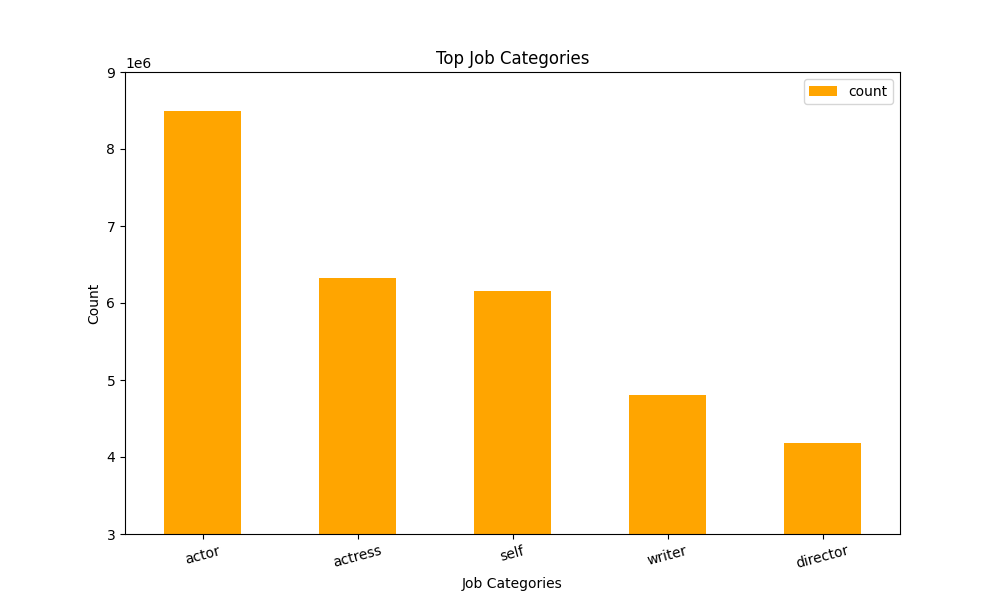

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

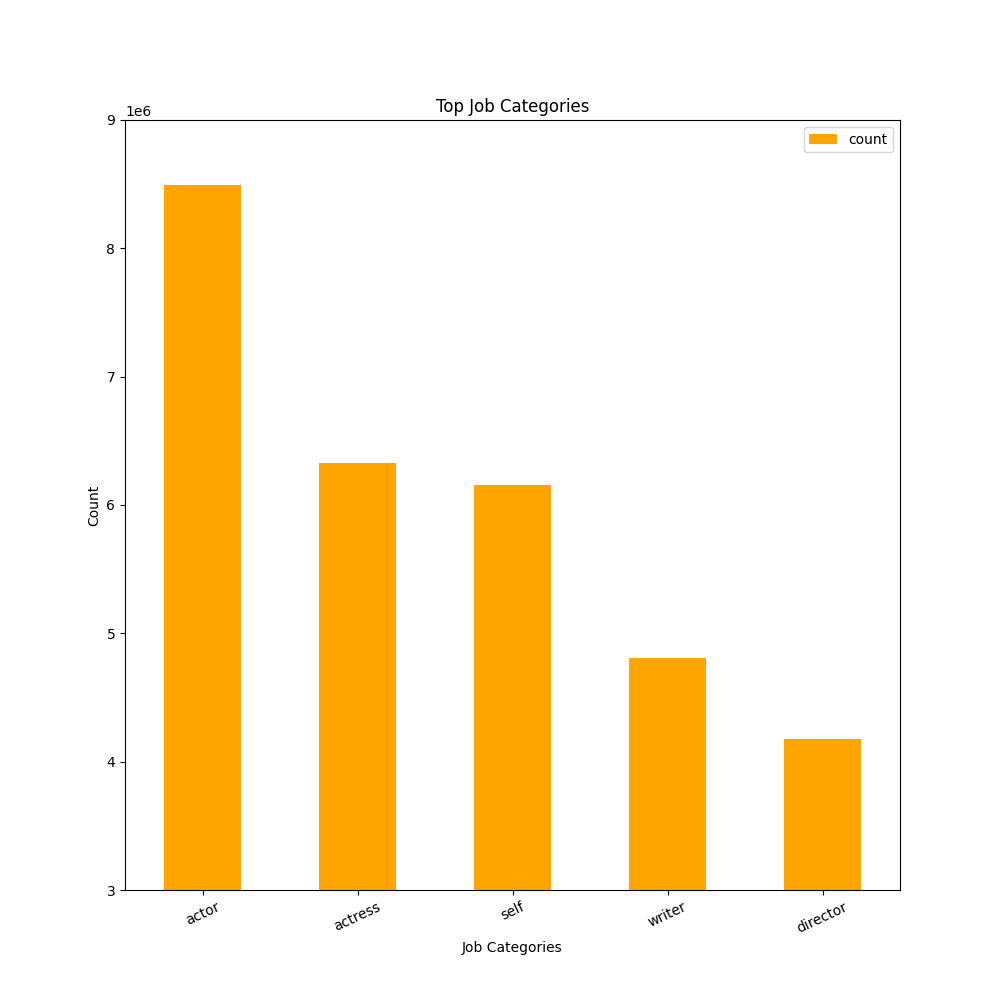

In [96]:
top_jobdb=top_job.toPandas().head(5).plot.bar(x= 'job_category',y='count',figsize=(10,10), color= 'orange')
plt.xlabel('Job Categories')
plt.ylabel('Count')  
plt.title('Top Job Categories')
plt.ylim(3000000,9000000)
plt.xticks(rotation=25)
%matplot plt


# PART 4 - Answer to the following questions:

You will need to join tables to answer the following questions.
Your code should meet all the requirements given in the question.

## 1) What are the movies in which both Johnny Depp and Helena Bonham Carter have acted together?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|primaryTitle                                  |
+----------------------------------------------+
|Dark Shadows                                  |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Corpse Bride                                  |
|Charlie and the Chocolate Factory             |
|Alice in Wonderland                           |
|Alice Through the Looking Glass               |
+----------------------------------------------+

In [ ]:
name.

In [80]:
jhtconst=spark.sql('''SELECT Principals.tconst
FROM Name INNER JOIN Principals ON Name.nconst == Principals.nconst
WHERE Name.primaryName == 'Johnny Depp' AND Principals.tconst IN (SELECT Principals.tconst
FROM Name INNER JOIN Principals ON Name.nconst == Principals.nconst
WHERE Name.primaryName == 'Helena Bonham Carter')
''')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [83]:
jhtconst.join(title, title.tconst == jhtconst.tconst, 'inner').select(title.primaryTitle).filter(title.titleType=='movie').show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|primaryTitle                                  |
+----------------------------------------------+
|Dark Shadows                                  |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Alice Through the Looking Glass               |
|Alice in Wonderland                           |
|Charlie and the Chocolate Factory             |
|Corpse Bride                                  |
+----------------------------------------------+

## 2) What are the movies in which Brad Pitt has acted since 2010?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------+---------+
|primaryTitle                     |startYear|
+---------------------------------+---------+
|Babylon                          |2021     |
|Once Upon a Time ... in Hollywood|2019     |
|Ad Astra                         |2019     |
|War Machine                      |2017     |
|Allied                           |2016     |
|The Big Short                    |2015     |
|By the Sea                       |2015     |
|Fury                             |2014     |
|World War Z                      |2013     |
|12 Years a Slave                 |2013     |
|Killing Them Softly              |2012     |
|The Tree of Life                 |2011     |
|Moneyball                        |2011     |
+---------------------------------+---------+

In [87]:
spark.sql('''SELECT primaryTitle, startYear
FROM Title
WHERE tconst IN (SELECT Principals.tconst
FROM Name INNER JOIN Principals ON Name.nconst == Principals.nconst
WHERE Name.primaryName == 'Brad Pitt' AND Principals.category == 'actor') AND titleType == 'movie' AND startYear > 2010''').show(truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------+---------+
|primaryTitle                     |startYear|
+---------------------------------+---------+
|By the Sea                       |2015     |
|Babylon                          |2021     |
|The Tree of Life                 |2011     |
|12 Years a Slave                 |2013     |
|The Big Short                    |2015     |
|Fury                             |2014     |
|Moneyball                        |2011     |
|Killing Them Softly              |2012     |
|Allied                           |2016     |
|War Machine                      |2017     |
|Ad Astra                         |2019     |
|World War Z                      |2013     |
|Once Upon a Time ... in Hollywood|2019     |
+---------------------------------+---------+

## 3) How many movies has Zendaya acted in each year?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|2020     |1    |
|2018     |2    |
|2017     |1    |
+---------+-----+

In [92]:
spark.sql('''SELECT startYear, COUNT(tconst) AS count
FROM Title
WHERE tconst IN (SELECT Principals.tconst
FROM Name INNER JOIN Principals ON Name.nconst == Principals.nconst
WHERE Name.primaryName == 'Zendaya') AND titleType == 'movie' AND startYear >2010 AND startYear<2023
GROUP BY startYear''').show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|     2018|    2|
|     2017|    1|
|     2020|    1|
+---------+-----+

## 4) Which movies, released in 2019, have an average rating exceeding 9.7?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------+-------------+
|PrimaryTitle                                     |averageRating|
+-------------------------------------------------+-------------+
|Bu Can Var Oldugu Sürece                         |10.0         |
|L'Enfant Terrible                                |10.0         |
|A Grunt's Life                                   |10.0         |
|Kirket                                           |10.0         |
|Our Scripted Life                                |10.0         |
|The Twilight Zone: A 60th Anniversary Celebration|10.0         |
|The Butcher Baronet                              |10.0         |
|A Medicine for the Mind                          |10.0         |
|Love in Kilnerry                                 |10.0         |
|Superhombre                                      |9.9          |
|Puritan: All of Life to The Glory of God         |9.9          |
|The Cardinal                                     |9.9          |
|Square On

In [99]:
spark.sql('''SELECT Title.primaryTitle, Ratings.averageRating
FROM Title INNER JOIN Ratings ON Title.tconst == Ratings.tconst
Where Title.startYear == 2019 AND Title.titleType == 'movie' AND Ratings.averageRating >9.7
ORDER BY Ratings.averageRating Desc
''').show(truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------+-------------+
|primaryTitle                                     |averageRating|
+-------------------------------------------------+-------------+
|Love in Kilnerry                                 |10.0         |
|A Grunt's Life                                   |10.0         |
|The Butcher Baronet                              |10.0         |
|The Twilight Zone: A 60th Anniversary Celebration|10.0         |
|A Medicine for the Mind                          |10.0         |
|Kirket                                           |10.0         |
|L'Enfant Terrible                                |10.0         |
|Our Scripted Life                                |10.0         |
|Bu Can Var Oldugu Sürece                         |10.0         |
|The Cardinal                                     |9.9          |
|Puritan: All of Life to The Glory of God         |9.9          |
|Superhombre                                      |9.9          |
|From Shoc

## 5) Among the titles in which Clint Eastwood and Harrison Ford have acted, who has the higher average rating?

First, calculate the average rating of each actor and then show the actor with higher average rating.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The average rating of Harrison Ford is 6.75
The average rating of Clint Eastwood is 7.71
Clint Eastwood has a higher average rating

In [174]:
harrison=name.join(principals, principals.nconst==name.nconst).filter(name.primaryName== 'Harrison Ford').select(principals.tconst)
harrisonavg=ratings.join(harrison, harrison.tconst == ratings.tconst).select(round(avg(ratings.averageRating),2))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [173]:
clint=name.join(principals, principals.nconst==name.nconst).filter(name.primaryName== 'Clint Eastwood').select(principals.tconst)
clintavg=ratings.join(clint, clint.tconst == ratings.tconst).select(round(avg(ratings.averageRating),2))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [177]:
print('The avg rating of Clint Eastwood is:', clintavg.head()[0])
print('The avg rating of Harrison Ford is:',harrisonavg.head()[0])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The avg rating of Clint Eastwood is: 7.32
The avg rating of Harrison Ford is: 6.76

In [175]:

if clintavg.head()[0] > harrisonavg.head()[0]:
	print('Clint Eastwood has a higher average rating')
else:
	print('Harrison Ford has a higher average rating')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Clint Eastwood has a higher average rating

## 6) What is the movie(s) with the highest average rating among those in which Chris Evans has acted?

Write your code in a way that it finds and displays all movies with the highest rating, even if there's more than one. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+-------------+
|primaryTitle          |averageRating|
+----------------------+-------------+
|Avengers: Infinity War|8.5          |
|Avengers: Endgame     |8.5          |
+----------------------+-------------+

In [122]:


spark.sql('''SELECT Title.primaryTitle,  Ratings.averageRating 
FROM Ratings INNER JOIN Title ON Ratings.tconst==Title.tconst

WHERE Title.titleType == 'movie' AND Ratings.averageRating ==
(SELECT MAX(averageRating)
FROM Ratings  
WHERE tconst IN
(SELECT Principals.tconst
FROM Name INNER JOIN Principals ON Name.nconst == Principals.nconst
WHERE Name.primaryName == 'Chris Evans') )
''').show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+
|        primaryTitle|averageRating|
+--------------------+-------------+
|     La rubia Mireya|          9.1|
|        La ragazzola|          9.1|
|    Clouds at Sunset|          9.1|
|           Confusion|          9.1|
|Roppa no shinkon ...|          9.1|
|          Városlakók|          9.1|
|        Nufarul rosu|          9.1|
|    A Pound of Flesh|          9.1|
|Benny Hill: A Tri...|          9.1|
|     Tinik sa dibdib|          9.1|
|           Yesterday|          9.1|
|  Gjeneral gramafoni|          9.1|
|Një shoqe nga fshati|          9.1|
|    Love in the City|          9.1|
|Mercedes Sosa: co...|          9.1|
|             Igorota|          9.1|
|         Remembrance|          9.1|
|Letting Go: A Hos...|          9.1|
|The Prince's Trus...|          9.1|
|      Highway Amazon|          9.1|
+--------------------+-------------+
only showing top 20 rows

In [197]:
chrise=name.filter(name.primaryName == 'Chris Evans').join(principals, name.nconst==principals.nconst, 'inner').select(principals.tconst)
chrise.show(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+
|   tconst|
+---------+
|tt2779964|
|tt2693956|
+---------+
only showing top 2 rows

In [198]:
christitles=chrise.join(title, chrise.tconst == title.tconst, 'inner').filter(title.titleType=='movie'). select(chrise.tconst, title.primaryTitle)
christitles.show(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+
|   tconst|        primaryTitle|
+---------+--------------------+
|tt0458339|Captain America: ...|
|tt0443465|        Before We Go|
+---------+--------------------+
only showing top 2 rows

In [202]:
ctitlerating= christitles.join(ratings, christitles.tconst==ratings.tconst, 'inner').select(christitles.tconst, christitles.primaryTitle, ratings.averageRating)
ctitlerating.show(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+-------------+
|   tconst|        primaryTitle|averageRating|
+---------+--------------------+-------------+
|tt0458339|Captain America: ...|          6.9|
|tt0443465|        Before We Go|          6.8|
+---------+--------------------+-------------+
only showing top 2 rows

In [204]:
mchris=ctitlerating.select(max('averageRating').alias('max_chris'))
mchris.show(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+
|max_chris|
+---------+
|      8.5|
+---------+

In [206]:
ctitlerating.join(mchris, ctitlerating.averageRating==mchris.max_chris, 'inner').select( title.primaryTitle, ctitlerating.averageRating).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+
|        primaryTitle|averageRating|
+--------------------+-------------+
|Avengers: Infinit...|          8.5|
|   Avengers: Endgame|          8.5|
+--------------------+-------------+

## 7) What is the percentage of adult titles in which actors and actresses have acted?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The percentage of adult titles actors have acted is: 2.14%
The percentage of adult titles actresses have acted is: 3.27%

In [128]:
merged=title.join(principals, title.tconst == principals.tconst, 'inner').select(title.tconst, title.isAdult, principals.category)
actors=merged.filter(merged.category == 'actor')
actress=merged.filter(merged.category == 'actress')
a_actors=merged.filter((merged.isAdult == '1') & (merged.category == 'actor'))
a_actresses=merged.filter((merged.isAdult == '1') & (merged.category == 'actress'))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [138]:
actorper=(a_actors.count()/actors.count())*100

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [137]:
actressper=(a_actresses.count()/actress.count())*100


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [140]:
print('The percentage of adult titles actors have acted is:', actorper, '%')
print('The percentage of adult titles actresses have acted is:', actressper, '%')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The percentage of adult titles actors have acted is: 3.0041019023690723 %
The percentage of adult titles actresses have acted is: 7.183509611477678 %

## 8) What are the top 10 movie genres with the shortest average runtime?

You do not need to join tables in this question.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-------------------+
|      genre|avg(runtimeMinutes)|
+-----------+-------------------+
|      Short|              18.67|
|       News|              66.85|
|Documentary|              72.68|
| Reality-TV|              76.28|
|      Adult|              77.18|
|    Western|              79.36|
|  Talk-Show|              79.43|
|  Animation|              80.75|
|  Biography|              81.05|
|  Film-Noir|              83.76|
+-----------+-------------------+
only showing top 10 rows

In [147]:
spark.sql('''
SELECT MovieG.genre, ROUND(AVG(Title.runtimeMinutes),2) AS average_runtime
FROM MovieG INNER JOIN Title ON MovieG.tconst=Title.tconst
GROUP BY genre
Order By average_runtime''').show(10)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+---------------+
|      genre|average_runtime|
+-----------+---------------+
|      Short|          18.67|
|       News|          66.85|
|Documentary|          72.68|
| Reality-TV|          76.28|
|      Adult|          77.18|
|    Western|          79.36|
|  Talk-Show|          79.43|
|  Animation|          80.75|
|  Biography|          81.05|
|  Film-Noir|          83.76|
+-----------+---------------+
only showing top 10 rows

## 9) What are the most common character names for actors and actresses in Romance movies?

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+-----+----------+
|category|count|characters|
+--------+-----+----------+
| actress|  228|  ["Anna"]|
|   actor|  182| ["David"]|
+--------+-----+----------+

In [155]:
spark.sql('''
SELECT Principals.category, Count(Principals.characters) AS count, Principals.characters
FROM Principals 
INNER JOIN MovieG ON Principals.tconst==MovieG.tconst
WHERE MovieG.genre== 'Romance' 
AND Principals.characters != '\\N'
AND (Principals.category == 'actress' OR Principals.category == 'actor')
GROUP BY Principals.characters, Principals.category 
ORDER BY count Desc
Limit 2''').show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+-----+----------+
|category|count|characters|
+--------+-----+----------+
|   actor|23227|        \N|
| actress|15177|        \N|
+--------+-----+----------+

In [231]:
prinfilt=principals.filter(((principals.category == 'actress') |(principals.category == 'actor')) &(principals.characters != '\\N')).select(principals.category, principals.characters, principals.tconst)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [232]:
nextstep=prinfilt.join(movieg, prinfilt.tconst==movieg.tconst, 'inner'). filter(movieg.genre == 'Romance').select(prinfilt.category, prinfilt.characters, prinfilt.tconst)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [233]:
nextstep.createOrReplaceTempView('Nextstep')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [235]:
spark.sql('''
SELECT category, characters, COUNT(characters) AS count
FROM Nextstep
WHERE 
GROUP BY category, characters
ORDER BY count DESC ''').show(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+----------+-----+
|category|characters|count|
+--------+----------+-----+
| actress|  ["Anna"]|  228|
|   actor| ["David"]|  182|
+--------+----------+-----+
only showing top 2 rows